In [ ]:
pip install phaseportrait

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 KB 4.7 MB/s eta 0:00:00


In [ ]:
from phaseportrait import PhasePortrait2D
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.integrate import odeint
from numpy import linalg as LA
from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression
from numpy import linalg as LA
import plotly.express as px
import pandas as pd

# 2D nonlinear ODE --- determine invarant manifolds numerically then test if they make an eigenfunction

(1) Find fixed points and eigenvectors using linearize2.nb \\
(3) Select starting values from linearization along eigenvector directions \\
(4) Numerically integrate to determine invariant manifolds \\
(5) Do linear regression to see if there is an eigenfunction


## 2D ODE

In [ ]:
def dxdt(x,y):
  dxdt = x+y
  return dxdt

def dydt(x,y):
  dydt = y+x**3
  return dydt

def F(x,y):
    dxvec_dt = [dxdt(x,y), dydt(x,y)];
    return dxvec_dt

def F_alt(x_vec, t):
    x = x_vec[0]
    y = x_vec[1]
    dxvec_dt = [dxdt(x,y), dydt(x,y)];
    return dxvec_dt

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff20d425fa0>)

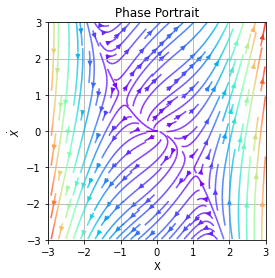

<Figure size 720x720 with 0 Axes>

In [ ]:
#########################
###### My system ########
#########################

phase_port = PhasePortrait2D(F, [-3,3])

plt.figure(figsize=(10,10))
phase_port.plot()


In [ ]:
# fixed points
fp1 = np.array([-1, 1])
fp2 = np.array([0, 0])
fp3 = np.array([1, -1])

# eigevectors for fp1
fp1_eigvec1 = np.array([1/np.sqrt(3), 1])
fp1_eigvec2 = np.array([-1/np.sqrt(3), 1])

# eigevectors for fp2
fp2_eigvec1 = np.array([1, 0])

# eigenvectors for fp3
fp3_eigvec1 = np.array([1/np.sqrt(3), 1])
fp3_eigvec2 = np.array([-1/np.sqrt(3), 1])


## Make M1(x,y) out of first invariant manifold

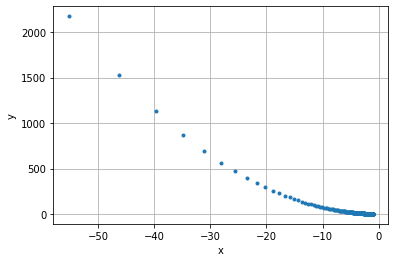

In [ ]:
## generate points near fp1 (-1,1) ##

## left side of fp1 ##

xy_init = fp1+0.001*fp1_eigvec2
t = np.linspace(0, -10.2, 2000)  #np.linspace(0, 10, 101)

sol_list = []

y0 = xy_init
sol = odeint(F_alt, y0, t)

plt.plot(sol[:,0], sol[:,1], '.')
sol = sol.tolist()
sol_list.append(sol)

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()




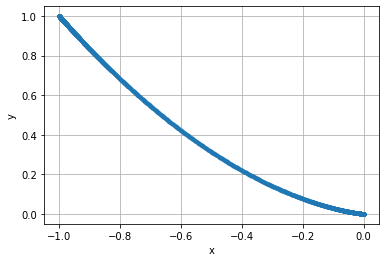

In [ ]:
## generate points near fp1 (-1,1) ##
## right side of fp1 ##

## generate points near fp1 (-1,1) ##

## left side of fp1 ##

xy_init = fp1-0.001*fp1_eigvec2
t = np.linspace(0, -20, 2000)  #np.linspace(0, 10, 101)

y0 = xy_init
sol = odeint(F_alt, y0, t)

plt.plot(sol[:,0], sol[:,1], '.')
sol = sol.tolist()
sol_list.append(sol)

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()



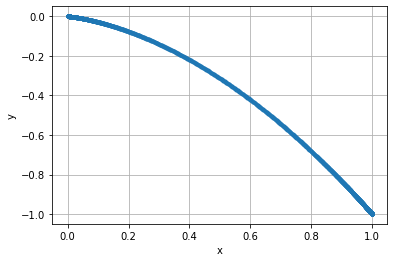

In [ ]:
## generate points near fp3 (1,-1) ##
## left side of fp3 ##

xy_init = fp3+0.001*fp3_eigvec2
t = np.linspace(0, -20, 2000)  #np.linspace(0, 10, 101)

y0 = xy_init
sol = odeint(F_alt, y0, t)

plt.plot(sol[:,0], sol[:,1], '.')
sol = sol.tolist()
sol_list.append(sol)

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

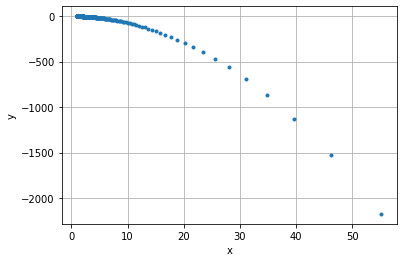

In [ ]:
## generate points near fp3 (1,-1) ##
## right side of fp3 ##

xy_init = fp3-0.001*fp3_eigvec2
t = np.linspace(0, -10.2, 2000)
y0 = xy_init
sol = odeint(F_alt, y0, t)

plt.plot(sol[:,0], sol[:,1], '.')
sol = sol.tolist()
sol_list.append(sol)

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

(-3.0, 3.0)

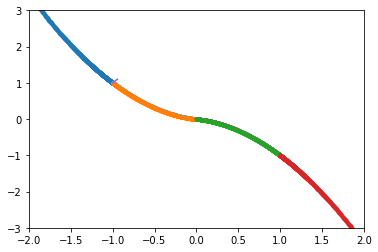

In [ ]:
## get rid of some of points ##
for i in range(0,len(sol_list)):
  sol = sol_list[i]

  range_max = len(sol)-1
  j = 0

  while j < range_max:
    #print(j)
    norm_tmp = 0
    while norm_tmp < 0.001:
      if j >= range_max-1:
          break
      diff_vec = np.array(sol[j])-np.array(sol[j+1])
      norm_tmp = LA.norm(diff_vec)
      range_max = len(sol)-1
      if norm_tmp <0.001:
        sol.pop(j+1)

    j = j+1


vec1 = np.stack((fp1, np.array(fp1)+0.1*np.array(fp1_eigvec1)), axis=0)

sol1 = np.array(sol_list[0])
sol2 = np.array(sol_list[1])
sol3 = np.array(sol_list[2])
sol4 = np.array(sol_list[3])

plt.figure()
plt.plot(sol1[:,0], sol1[:,1], '.')
plt.plot(sol2[:,0], sol2[:,1], '.')
plt.plot(sol3[:,0], sol3[:,1], '.')
plt.plot(sol4[:,0], sol4[:,1], '.')

plt.plot(vec1[:,0], vec1[:,1])

plt.xlim([-2,2])
plt.ylim([-3,3])

#plt.xlim([-4,0])
#plt.ylim([0,2])

In [ ]:
sol_list[0].reverse()
sol_list[2].reverse()


(-1.0, 1.0)

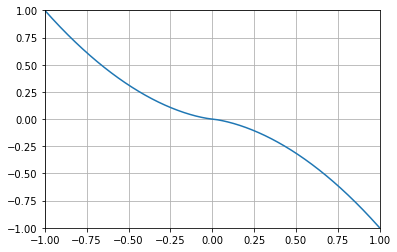

In [ ]:
all_points =sol_list[0] +  sol_list[1] +  sol_list[2] + sol_list[3]
all_points = np.array(all_points)

plt.figure()
plt.plot(all_points[:,0],all_points[:,1])
plt.grid(visible=1)

plt.xlim([-1,1])
plt.ylim([-1,1])

## Interpolate points on manifold 1

In [ ]:
## interpolate points ##
m1 = interp1d(all_points[:,0], all_points[:,1], kind='cubic')

## derivative of m1 ##
m1_deriv = m1._spline.derivative(nu=1)

################################
###  dxdt = f1,   dydt = f2  ###
################################

def M1(x,y):
  z=y-m1(x)
  return z

def N1(x,y):
  z = (dydt(x,y) - m1_deriv(x).flatten()*dxdt(x,y))/(y-m1(x))
  #z = (dydt(x,y) - dxdt(x,y))/(y-m1(x))
  return z


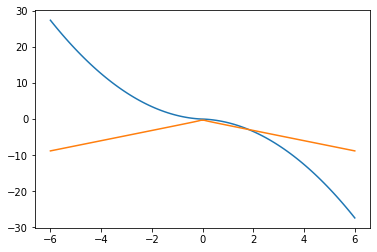

In [ ]:
xtest = np.linspace(-6,6,100)
plt.plot(xtest, m1(xtest))
plt.plot(xtest, m1_deriv(xtest))

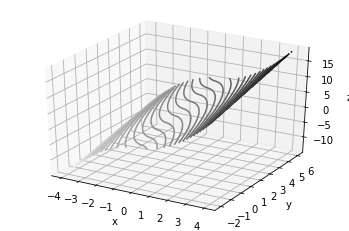

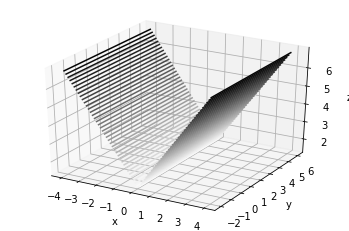

In [ ]:
### Plot M1  ###
x = np.linspace(-4, 4, 60)
y = np.linspace(-2, 6, 60)

X, Y = np.meshgrid(x, y)
Z = M1(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

### Plot N1  ###
X = np.reshape(X, (1,-1))
Y = np.reshape(Y, (1,-1))

Z = N1(X, Y)

X = np.reshape(X, (60,60))
Y = np.reshape(Y, (60,60))
Z = np.reshape(Z, (60,60))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [ ]:
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()

d = {'col1': X, 'col2': Y, 'col3': Z}
df = pd.DataFrame(data=d)

fig = px.scatter_3d(df, x='col1', y='col2', z='col3', opacity=0.5)
fig.update_traces(marker_size=3)
fig.show()

## Make M2(x,y) out of 2nd invariant manifold

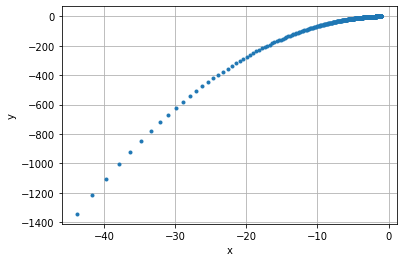

In [ ]:
## generate points near fp1 (-1,1) ##

## left side of fp1 ##

xy_init = fp1-0.001*fp1_eigvec1
t = np.linspace(0, 3.25, 2000)  #np.linspace(0, 10, 101)

sol_list = []

y0 = xy_init
sol = odeint(F_alt, y0, t)

plt.plot(sol[:,0], sol[:,1], '.')
sol = sol.tolist()
sol_list.append(sol)

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()




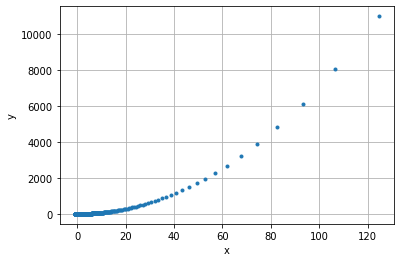

In [ ]:
## generate points near fp1 (-1,1) ##

## right side of fp1 ##

xy_init = fp1+0.001*fp1_eigvec1
t = np.linspace(0, 3.8, 2000)  #np.linspace(0, 10, 101)
y0 = xy_init
sol = odeint(F_alt, y0, t)

plt.plot(sol[:,0], sol[:,1], '.')
sol = sol.tolist()
sol_list.append(sol)

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

(-10.0, 10.0)

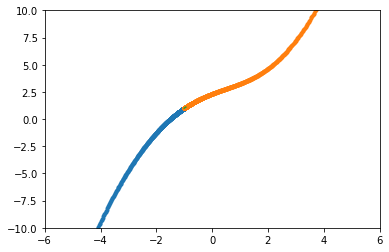

In [ ]:
## get rid of some of points ##
for i in range(0,len(sol_list)):
  sol = sol_list[i]

  range_max = len(sol)-1
  j = 0

  while j < range_max:
    #print(j)
    norm_tmp = 0
    while norm_tmp < 0.001:
      if j >= range_max-1:
          break
      diff_vec = np.array(sol[j])-np.array(sol[j+1])
      norm_tmp = LA.norm(diff_vec)
      range_max = len(sol)-1
      if norm_tmp <0.001:
        sol.pop(j+1)

    j = j+1


vec1 = np.stack((fp1, np.array(fp1)+0.1*np.array(fp1_eigvec1)), axis=0)

sol1 = np.array(sol_list[0])
sol2 = np.array(sol_list[1])

plt.figure()
plt.plot(sol1[:,0], sol1[:,1], '.')
plt.plot(sol2[:,0], sol2[:,1], '.')

plt.plot(vec1[:,0], vec1[:,1])

plt.xlim([-6,6])
plt.ylim([-10,10])

#plt.xlim([-4,0])
#plt.ylim([0,2])

In [ ]:
sol_list[0].reverse()

(-4.0, 4.0)

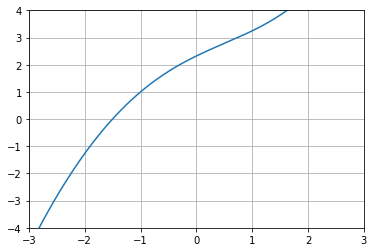

In [ ]:
all_points2 =sol_list[0] +  sol_list[1] 
all_points2 = np.array(all_points2)

plt.figure()
plt.plot(all_points2[:,0],all_points2[:,1])
plt.grid()
plt.xlim([-3, 3])
plt.ylim([-4,4])

## Interpolate points on manifold 2

In [ ]:
## interpolate points ##
m2 = interp1d(all_points2[:,0], all_points2[:,1], kind='cubic')

## derivative of m1 ##
m2_deriv = m2._spline.derivative(nu=1)

################################
###  dxdt = f1,   dydt = f2  ###
################################

def M2(x,y):
  z=y-m2(x)
  return z

def N2(x,y):
  z = (dydt(x,y) - m2_deriv(x).flatten()*dxdt(x,y))/(y-m2(x))
  return z


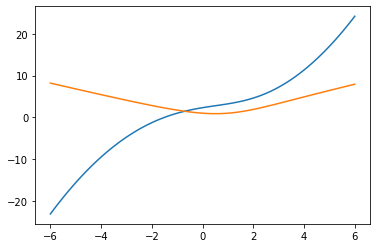

In [ ]:
xtest = np.linspace(-6,6,100)
plt.plot(xtest, m2(xtest))
plt.plot(xtest, m2_deriv(xtest))

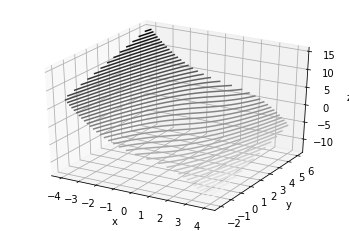

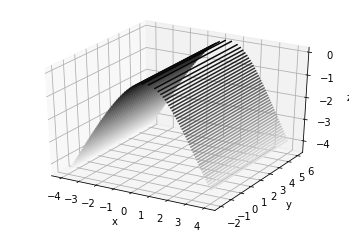

In [ ]:
### Plot M1  ###
x = np.linspace(-4, 4, 60)
y = np.linspace(-2, 6, 60)

X, Y = np.meshgrid(x, y)
Z = M2(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

### Plot N1  ###
X = np.reshape(X, (1,-1))
Y = np.reshape(Y, (1,-1))

Z = N2(X, Y)

X = np.reshape(X, (60,60))
Y = np.reshape(Y, (60,60))
Z = np.reshape(Z, (60,60))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [ ]:
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()

d = {'col1': X, 'col2': Y, 'col3': Z}
df = pd.DataFrame(data=d)

fig = px.scatter_3d(df, x='col1', y='col2', z='col3', opacity=0.5)
fig.update_traces(marker_size=3)
fig.show()

## Make M3(x,y) out of 3rd invariant manifold

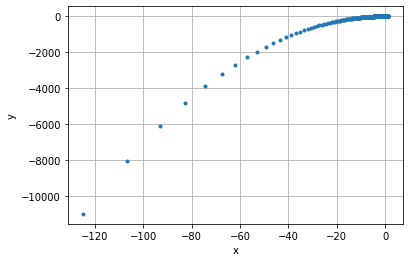

In [ ]:
## generate points near fp3 (1,-1) ##

## left side of fp3 ##

xy_init = fp3-0.001*fp3_eigvec1
t = np.linspace(0, 3.8, 2000)  #np.linspace(0, 10, 101)

sol_list = []

y0 = xy_init
sol = odeint(F_alt, y0, t)

plt.plot(sol[:,0], sol[:,1], '.')
sol = sol.tolist()
sol_list.append(sol)

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

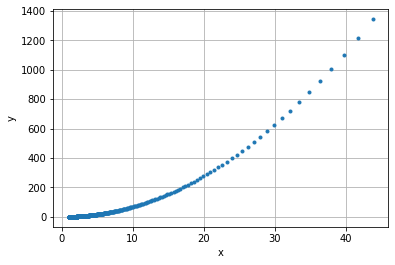

In [ ]:
## generate points near fp3 (1,-1) ##

## right side of fp3 ##

xy_init = fp3+0.001*fp3_eigvec1
t = np.linspace(0, 3.25, 2000)  #np.linspace(0, 10, 101)

y0 = xy_init
sol = odeint(F_alt, y0, t)

plt.plot(sol[:,0], sol[:,1], '.')
sol = sol.tolist()
sol_list.append(sol)

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

(-10.0, 10.0)

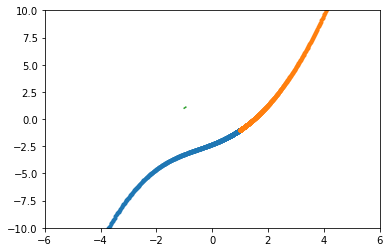

In [ ]:
## get rid of some of points ##
for i in range(0,len(sol_list)):
  sol = sol_list[i]

  range_max = len(sol)-1
  j = 0

  while j < range_max:
    #print(j)
    norm_tmp = 0
    while norm_tmp < 0.001:
      if j >= range_max-1:
          break
      diff_vec = np.array(sol[j])-np.array(sol[j+1])
      norm_tmp = LA.norm(diff_vec)
      range_max = len(sol)-1
      if norm_tmp <0.001:
        sol.pop(j+1)

    j = j+1


vec1 = np.stack((fp1, np.array(fp1)+0.1*np.array(fp1_eigvec1)), axis=0)

sol1 = np.array(sol_list[0])
sol2 = np.array(sol_list[1])

plt.figure()
plt.plot(sol1[:,0], sol1[:,1], '.')
plt.plot(sol2[:,0], sol2[:,1], '.')

plt.plot(vec1[:,0], vec1[:,1])

plt.xlim([-6,6])
plt.ylim([-10,10])

In [ ]:
sol_list[0].reverse()

(-4.0, 4.0)

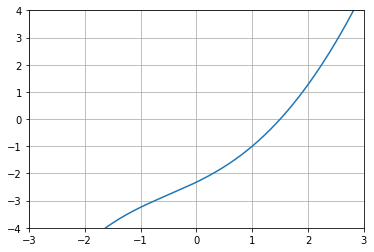

In [ ]:
all_points3 =sol_list[0] +  sol_list[1] 
all_points3 = np.array(all_points3)

plt.figure()
plt.plot(all_points3[:,0],all_points3[:,1])
plt.grid()
plt.xlim([-3,3])
plt.ylim([-4,4])

## Interpolate points on manifold 3

In [ ]:
## interpolate points ##
m3 = interp1d(all_points3[:,0], all_points3[:,1], kind='cubic')

## derivative of m1 ##
m3_deriv = m3._spline.derivative(nu=1)

################################
###  dxdt = f1,   dydt = f2  ###
################################

def M3(x,y):
  z=y-m3(x)
  return z

def N3(x,y):
  z = (dydt(x,y) - m3_deriv(x).flatten()*dxdt(x,y))/(y-m3(x))
  return z


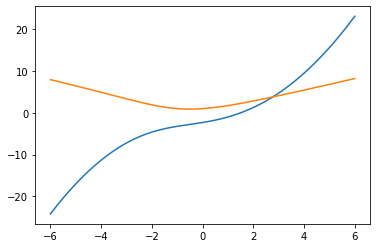

In [ ]:
xtest = np.linspace(-6,6,100)
plt.plot(xtest, m3(xtest))
plt.plot(xtest, m3_deriv(xtest))

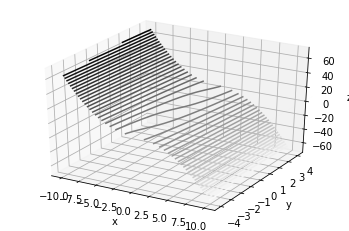

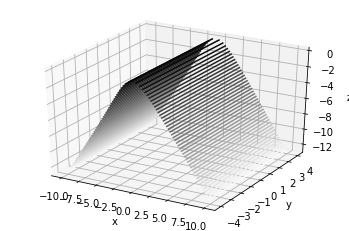

In [ ]:
### Plot M3 ###
x = np.linspace(-10, 10, 60)
y = np.linspace(-4, 4, 60)

X, Y = np.meshgrid(x, y)
Z = M3(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

### Plot N3  ###
X = np.reshape(X, (1,-1))
Y = np.reshape(Y, (1,-1))

Z = N3(X, Y)

X = np.reshape(X, (60,60))
Y = np.reshape(Y, (60,60))
Z = np.reshape(Z, (60,60))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [ ]:
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()

d = {'col1': X, 'col2': Y, 'col3': Z}
df = pd.DataFrame(data=d)

fig = px.scatter_3d(df, x='col1', y='col2', z='col3', opacity=0.5)
fig.update_traces(marker_size=3)
fig.show()

## Make M4(x,y) out of 4th invariant manifold

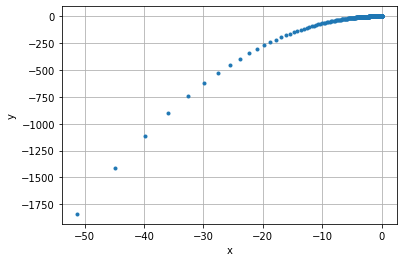

In [ ]:
## generate points near fp2 (0,0) ##

## left side of fp2 ##
xy_init = fp2-0.001*fp2_eigvec1
#xy_init = fp2-0.001*(fp2_eigvec1+np.array([0, 1]))
t = np.linspace(0, 7.7, 2000)  
#t = np.linspace(0, 5.9, 2000) 

sol_list = []

y0 = xy_init
sol = odeint(F_alt, y0, t)

plt.plot(sol[:,0], sol[:,1], '.')
sol = sol.tolist()
sol_list.append(sol)

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

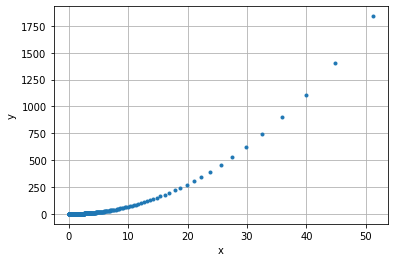

In [ ]:
## generate points near fp2 (0,0) ##

## right side of fp2 ##
xy_init = fp2+0.001*fp2_eigvec1
#xy_init = fp2+0.001*(fp2_eigvec1+np.array([0, 1]))
t = np.linspace(0, 7.7, 2000)  
#t = np.linspace(0, 5.9, 2000) 

y0 = xy_init
sol = odeint(F_alt, y0, t)

plt.plot(sol[:,0], sol[:,1], '.')
sol = sol.tolist()
sol_list.append(sol)

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

(-10.0, 10.0)

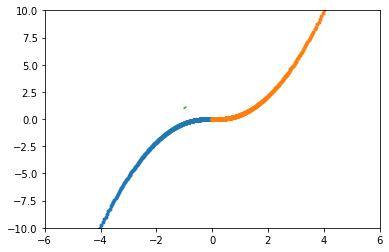

In [ ]:
## get rid of some of points ##
for i in range(0,len(sol_list)):
  sol = sol_list[i]

  range_max = len(sol)-1
  j = 0

  while j < range_max:
    #print(j)
    norm_tmp = 0
    while norm_tmp < 0.001:
      if j >= range_max-1:
          break
      diff_vec = np.array(sol[j])-np.array(sol[j+1])
      norm_tmp = LA.norm(diff_vec)
      range_max = len(sol)-1
      if norm_tmp <0.001:
        sol.pop(j+1)

    j = j+1

sol1 = np.array(sol_list[0])
sol2 = np.array(sol_list[1])

plt.figure()
plt.plot(sol1[:,0], sol1[:,1], '.')
plt.plot(sol2[:,0], sol2[:,1], '.')

plt.xlim([-6,6])
plt.ylim([-10,10])


In [ ]:
sol_list[0].reverse()

(-0.1, 0.1)

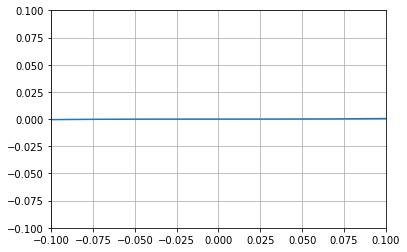

In [ ]:
all_points4 =sol_list[0] +  sol_list[1] 
all_points4 = np.array(all_points4)

plt.figure()
plt.plot(all_points4[:,0],all_points4[:,1])
plt.grid()
plt.xlim([-10,10])
plt.ylim([-10,10])

## Interpolate points on manifold 4

In [ ]:
## interpolate points ##
m4 = interp1d(all_points4[:,0], all_points4[:,1], kind='cubic')

## derivative of m1 ##
m4_deriv = m4._spline.derivative(nu=1)

################################
###  dxdt = f1,   dydt = f2  ###
################################

def M4(x,y):
  z=y-m4(x)
  return z

def N4(x,y):
  z = (dydt(x,y) - m4_deriv(x).flatten()*dxdt(x,y))/(y-m4(x))
  return z

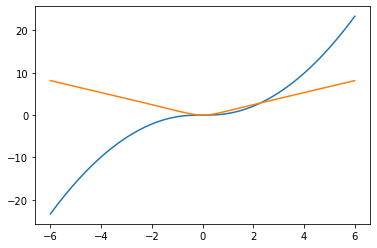

In [ ]:
xtest = np.linspace(-6,6,100)
plt.plot(xtest, m4(xtest))
plt.plot(xtest, m4_deriv(xtest))

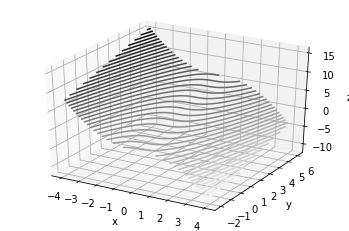

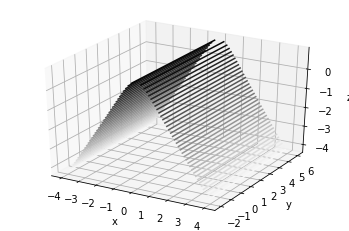

In [ ]:
### Plot M4  ###
x = np.linspace(-4, 4, 60)
y = np.linspace(-2, 6, 60)

X, Y = np.meshgrid(x, y)
Z = M4(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

### Plot N4  ###
X = np.reshape(X, (1,-1))
Y = np.reshape(Y, (1,-1))

Z = N4(X, Y)

X = np.reshape(X, (60,60))
Y = np.reshape(Y, (60,60))
Z = np.reshape(Z, (60,60))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [ ]:
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()

d = {'col1': X, 'col2': Y, 'col3': Z}
df = pd.DataFrame(data=d)

fig = px.scatter_3d(df, x='col1', y='col2', z='col3', opacity=0.5)
fig.update_traces(marker_size=3)
fig.show()

## Test can any combination of invariant manifolds make an eigenfunction?

In [ ]:
num_samps=1000

xtest = np.random.uniform(-10, 10, num_samps)
ytest = np.random.uniform(-8, 8, num_samps)

ones_vec = np.ones(num_samps)

out1 = np.reshape(N1(xtest,ytest),(-1,1))
out2 = np.reshape(N2(xtest,ytest),(-1,1))
out3 = np.reshape(N3(xtest,ytest),(-1,1))
out4 = np.reshape(N4(xtest,ytest),(-1,1))

mat = np.hstack((out1, out4))
#mat = np.hstack((out1, out2, out3, out4))

Text(0.5, 1.0, 'invariant manifolds and regression points')

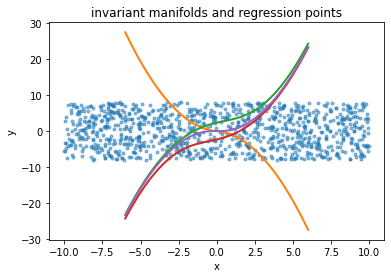

In [ ]:
xt = np.linspace(-6,6,100)

plt.plot(xtest,ytest,'.', alpha=0.5)
plt.plot(xt, m1(xt),linewidth=2)
plt.plot(xt, m2(xt),linewidth=2)
plt.plot(xt, m3(xt),linewidth=2)
plt.plot(xt, m4(xt),linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('invariant manifolds and regression points')

In [ ]:
## Regress combination of N-functions ##
model = LinearRegression(fit_intercept=False).fit(mat,ones_vec)

out = model.coef_
print('coeffs = ',out)

#print(model.intercept_)

print('regression error =',LA.norm(ones_vec - np.matmul(mat,out), 2))

coeffs =  [0.37392358 0.37367202]
regression error = 0.5077757389915937


Text(0.5, 1.0, 'p1*N1(x,y) + p4*N4(x,y)')

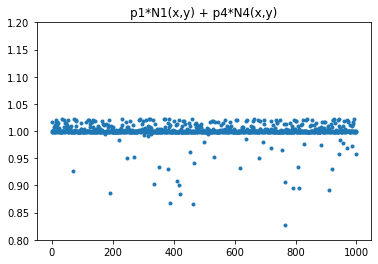

In [ ]:
plt.plot(np.matmul(mat,out),'.')
plt.ylim([0.8,1.2])
plt.title('p1*N1(x,y) + p4*N4(x,y)')

## Visualize combination of N(x,y) functions

(0.8, 1.2)

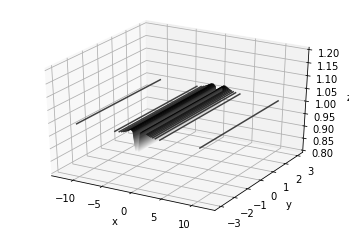

In [ ]:
### Plot M1  ###
x = np.linspace(-12, 12, 60)
y = np.linspace(-3, 3, 60)

X, Y = np.meshgrid(x, y)

### Plot N1  ###
X = np.reshape(X, (1,-1))
Y = np.reshape(Y, (1,-1))

Z = out[0]*N1(X, Y) +  out[1]*N4(X, Y)
#Z = out[0]*N1(X, Y) + out[1]*N2(X, Y) + out[2]*N3(X, Y) + out[3]*N4(X, Y)

X = np.reshape(X, (60,60))
Y = np.reshape(Y, (60,60))
Z = np.reshape(Z, (60,60))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.set_zlim(0.8,1.2)

In [ ]:
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()

d = {'x': X, 'y': Y, 'linear combo N(x,y)': Z}
df = pd.DataFrame(data=d)

fig = px.scatter_3d(df, x='x', y='y', z='linear combo N(x,y)', opacity=0.5)


fig.update_traces(marker_size=3)
fig.show()